<a href="https://colab.research.google.com/github/Consolucas/ChallengeAlura_TelecomX_II/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom_X parte II

## ETL

In [26]:
import requests
import pandas as pd
import json
import numpy as np

In [27]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

In [28]:
df = pd.json_normalize(data, sep='_')

In [29]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [63]:
for i in df:
  print(i, df[i].unique(), df[i].dtype)

Churn [0 1] int64
customer_gender [1 0] int64
customer_SeniorCitizen [0 1] int64
customer_Partner [1 0] int64
customer_Dependents [1 0] int64
customer_tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0] int64
phone_PhoneService [1 0] int64
phone_MultipleLines ['No' 'Yes' 'No phone service'] object
internet_InternetService ['DSL' 'Fiber optic' 'No'] object
internet_OnlineSecurity ['No' 'Yes' 'No internet service'] object
internet_OnlineBackup ['Yes' 'No' 'No internet service'] object
internet_DeviceProtection ['No' 'Yes' 'No internet service'] object
internet_TechSupport ['Yes' 'No' 'No internet service'] object
internet_StreamingTV ['Yes' 'No' 'No internet service'] object
internet_StreamingMovies ['No' 'Yes' 'No internet service'] object
account_Contract ['One year' 'Month-to-month' 'Two year'] object
account

In [32]:
df.drop(['customerID'], axis=1, inplace=True)
# excluindo coluna customerid

In [33]:
df = df[df['Churn'] != ''].copy()
# limpando valores vaziospara churn

In [36]:
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
df['account_Charges_Total'].fillna(0, inplace=True)
# transformando valores vazios em 0

/tmp/ipython-input-1985586193.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account_Charges_Total'].fillna(0, inplace=True)


In [37]:
df['account_Charges_Total']=df['account_Charges_Total'].astype(float)
# transformando coluna em float

## Encoding

In [42]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['customer_gender'] = df['customer_gender'].replace({'Female': 1, 'Male': 0})
df['customer_Partner'] = df['customer_Partner'].replace({'Yes': 1, 'No': 0})
df['customer_Dependents'] = df['customer_Dependents'].replace({'Yes': 1, 'No': 0})
df['phone_PhoneService'] = df['phone_PhoneService'].replace({'Yes': 1, 'No': 0})
df['account_PaperlessBilling'] = df['account_PaperlessBilling'].replace({'Yes': 1, 'No': 0})
# transformando valores de "yes" e "no" em 0 e 1

/tmp/ipython-input-2305028717.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['account_PaperlessBilling'] = df['account_PaperlessBilling'].replace({'Yes': 1, 'No': 0})


In [45]:
variaveis_categoricas = ['phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity',
                         'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport',
                         'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
                         'account_PaymentMethod']

In [46]:
df_encoded = pd.get_dummies(data=df, columns=variaveis_categoricas, dtype=int)
df_encoded.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,...,internet_StreamingMovies_No,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_Month-to-month,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Bank transfer (automatic),account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,1,0,1,1,9,1,1,65.6,593.30,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,9,1,0,59.9,542.40,...,0,0,1,1,0,0,0,0,0,1
2,1,0,0,0,0,4,1,1,73.9,280.85,...,1,0,0,1,0,0,0,0,1,0
3,1,0,1,1,0,13,1,1,98.0,1237.85,...,0,0,1,1,0,0,0,0,1,0
4,1,1,1,1,0,3,1,1,83.9,267.40,...,1,0,0,1,0,0,0,0,0,1


In [47]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 41 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7043 non-null   int64  
 1   customer_gender                                  7043 non-null   int64  
 2   customer_SeniorCitizen                           7043 non-null   int64  
 3   customer_Partner                                 7043 non-null   int64  
 4   customer_Dependents                              7043 non-null   int64  
 5   customer_tenure                                  7043 non-null   int64  
 6   phone_PhoneService                               7043 non-null   int64  
 7   account_PaperlessBilling                         7043 non-null   int64  
 8   account_Charges_Monthly                          7043 non-null   float64
 9   account_Charges_Total              

In [48]:
df_encoded.nunique()

,0
Churn,2
customer_gender,2
customer_SeniorCitizen,2
customer_Partner,2
customer_Dependents,2
customer_tenure,73
phone_PhoneService,2
account_PaperlessBilling,2
account_Charges_Monthly,1585
account_Charges_Total,6531


## Verificação da Proporção de Evasão

In [49]:
churn_counts = df['Churn'].value_counts(normalize=True)

print(churn_counts)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [55]:
import matplotlib.pyplot as plt

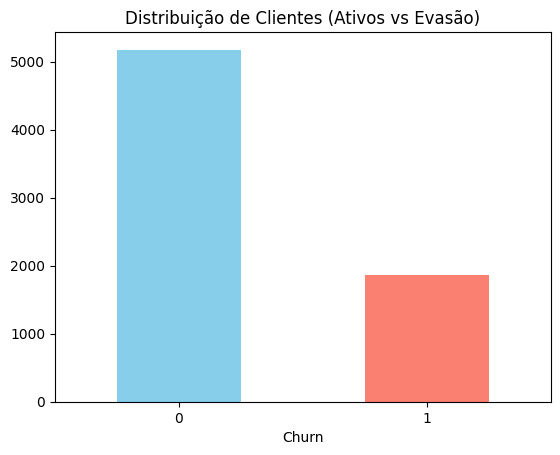

In [56]:
df['Churn'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Distribuição de Clientes (Ativos vs Evasão)')
plt.xticks(rotation=0)
plt.show()


In [51]:
ratio = df['Churn'].value_counts()[0] / df['Churn'].value_counts()[1]
print(f"Razão entre ativos e evadidos: {ratio:.2f}")


Razão entre ativos e evadidos: 2.77


In [53]:
from sklearn.metrics import accuracy_score


In [54]:
y = df['Churn']
y_pred_baseline = [y.mode()[0]] * len(y)

print("Acurácia baseline (sempre prever a maioria):", accuracy_score(y, y_pred_baseline))


Acurácia baseline (sempre prever a maioria): 0.7346301292063041


## Balanceamento de classes

In [60]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [64]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

print("Distribuição após RandomOverSampler:")
print(y_ros.value_counts())

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("\nDistribuição após SMOTE:")
print(y_smote.value_counts())


Distribuição após RandomOverSampler:
Churn
0    5174
1    5174
Name: count, dtype: int64

Distribuição após SMOTE:
Churn
0    5174
1    5174
Name: count, dtype: int64


## Pipeline para validação

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.3, random_state=42, stratify=y_smote
)

# Treinar modelo
clf = DecisionTreeClassifier(random_state=42, max_depth=8)
clf.fit(X_train, y_train)

# Avaliar
y_pred = clf.predict(X_test)

print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Matriz de Confusão:
 [[1250  303]
 [ 271 1281]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1553
           1       0.81      0.83      0.82      1552

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



## Análise de correlação

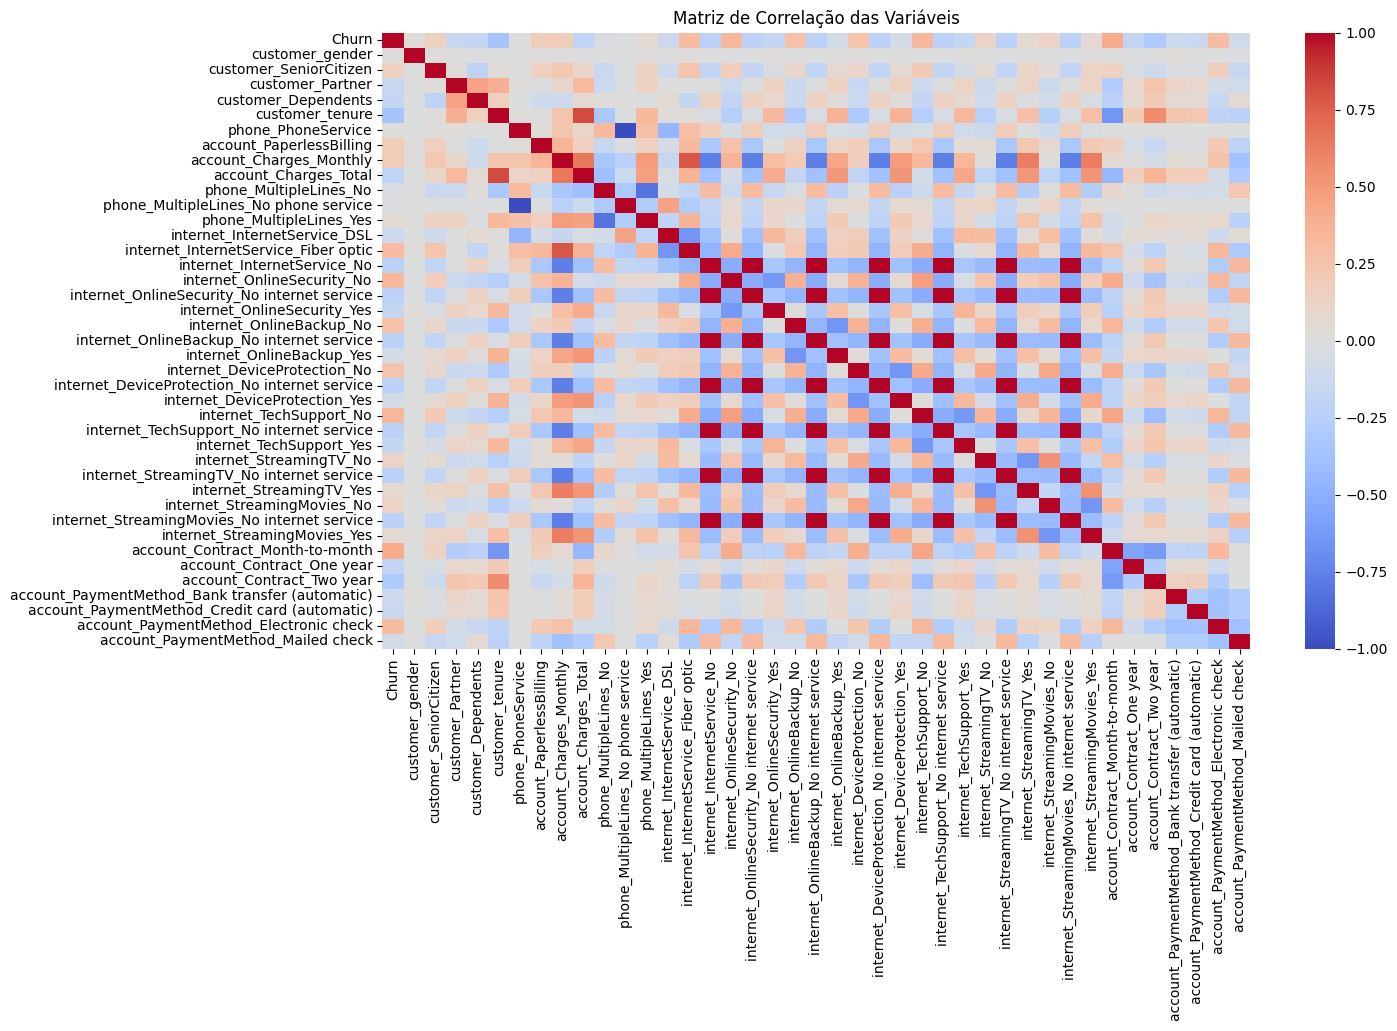

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular correlação
corr = df_encoded.corr()

# Heatmap da correlação
plt.figure(figsize=(14,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de Correlação das Variáveis")
plt.show()


In [80]:
corr_target = corr["Churn"].sort_values(ascending=False)
print(corr_target)


Churn                                              1.000000
account_Contract_Month-to-month                    0.405103
internet_OnlineSecurity_No                         0.342637
internet_TechSupport_No                            0.337281
internet_InternetService_Fiber optic               0.308020
account_PaymentMethod_Electronic check             0.301919
internet_OnlineBackup_No                           0.268005
internet_DeviceProtection_No                       0.252481
account_Charges_Monthly                            0.193356
account_PaperlessBilling                           0.191825
customer_SeniorCitizen                             0.150889
internet_StreamingMovies_No                        0.130845
internet_StreamingTV_No                            0.128916
internet_StreamingTV_Yes                           0.063228
internet_StreamingMovies_Yes                       0.061382
phone_MultipleLines_Yes                            0.040102
phone_PhoneService                      

### Análise de Correlação

A matriz de correlação foi utilizada para identificar relações entre as variáveis numéricas e a variável alvo (*Churn*).  
As variáveis com maior correlação positiva/negativa com o *Churn* são fortes candidatas a desempenhar papel relevante nos modelos preditivos, pois indicam comportamentos que diferenciam clientes que permanecem ativos daqueles que evadem.


## Análise direcionada

### Contrato x Evasão

/tmp/ipython-input-2198960772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="customer_tenure", data=df_encoded, palette="Set2")


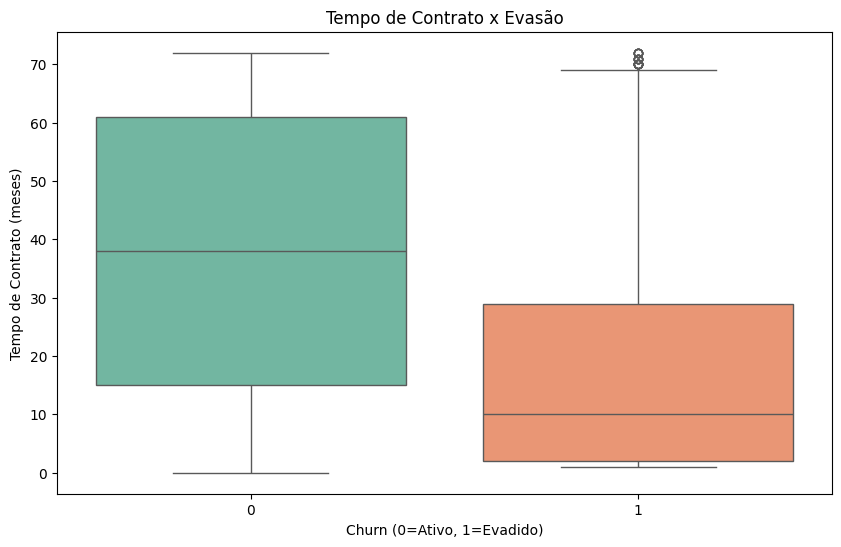

In [83]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Churn", y="customer_tenure", data=df_encoded, palette="Set2")
plt.title("Tempo de Contrato x Evasão")
plt.xlabel("Churn (0=Ativo, 1=Evadido)")
plt.ylabel("Tempo de Contrato (meses)")
plt.show()


### Total gasto x evasão

/tmp/ipython-input-1531155775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="account_Charges_Total", data=df_encoded, palette="Set2")


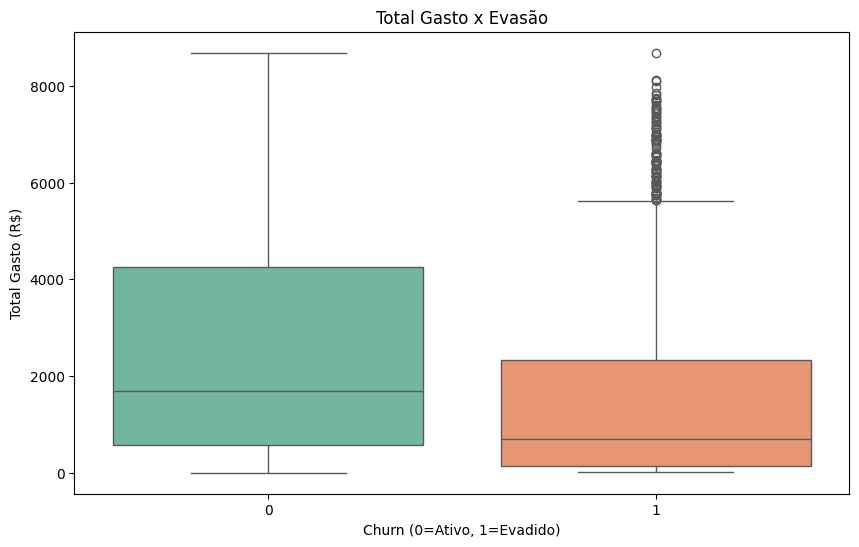

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Churn", y="account_Charges_Total", data=df_encoded, palette="Set2")
plt.title("Total Gasto x Evasão")
plt.xlabel("Churn (0=Ativo, 1=Evadido)")
plt.ylabel("Total Gasto (R$)")
plt.show()


### Tempo de Contrato x Total Gasto colorido por Evasão

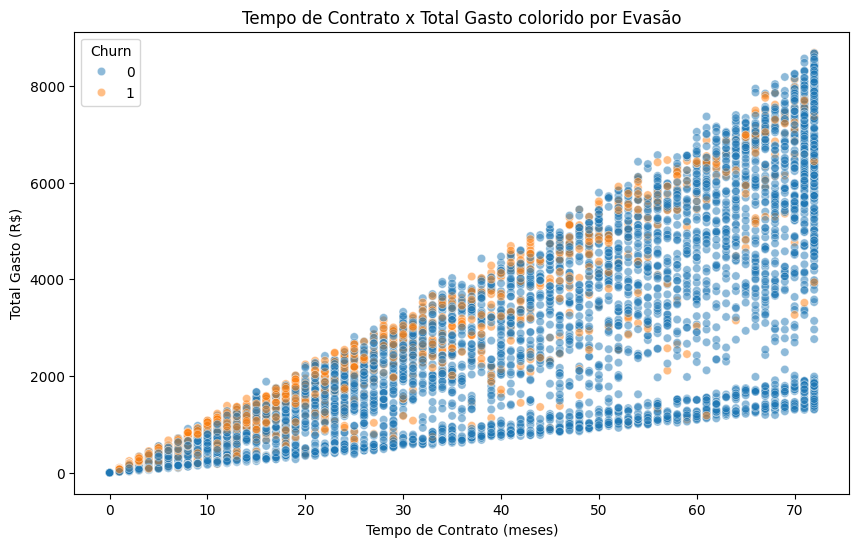

In [84]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="customer_tenure", y="account_Charges_Total", hue="Churn", data=df_encoded, alpha=0.5)
plt.title("Tempo de Contrato x Total Gasto colorido por Evasão")
plt.xlabel("Tempo de Contrato (meses)")
plt.ylabel("Total Gasto (R$)")
plt.show()

### Análises Direcionadas

Foram exploradas variáveis relevantes em relação à evasão:

- **Tempo de contrato:** clientes com menor tempo de permanência apresentaram maior probabilidade de evasão.
- **Total gasto:** clientes que evadiram tendem a ter gasto total menor, reflexo de contratos mais curtos.
- **Tempo de contrato x Total gasto:** o gráfico de dispersão mostra um padrão claro, em que clientes com longo tempo de contrato também acumulam maior gasto e permanecem ativos, enquanto os evadidos se concentram em baixos valores.

Essas evidências reforçam a importância dessas variáveis para a modelagem preditiva.


## Modelagem preditiva

### Separação dos dados

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# Dados já balanceados com SMOTE
X = X_smote
y = y_smote

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)


Tamanho treino: (7243, 40)
Tamanho teste: (3105, 40)


### Criação dos modelos

In [89]:
#Regressão Logística

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_log = Pipeline([
    ('scaler', StandardScaler()),  # Normalização
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

pipe_log.fit(X_train, y_train)
y_pred_log = pipe_log.predict(X_test)


In [88]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


### Avaliação dos modelos

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def avaliar_modelo(nome, y_true, y_pred):
    print(f"--- {nome} ---")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("Precisão:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("\nMatriz de Confusão:\n", confusion_matrix(y_true, y_pred))
    print("\nRelatório de Classificação:\n", classification_report(y_true, y_pred))
    print("\n")

avaliar_modelo("Regressão Logística", y_test, y_pred_log)
avaliar_modelo("Random Forest", y_test, y_pred_rf)


--- Regressão Logística ---
Acurácia: 0.8454106280193237
Precisão: 0.8440308087291399
Recall: 0.8472938144329897
F1-score: 0.8456591639871383

Matriz de Confusão:
 [[1310  243]
 [ 237 1315]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1553
           1       0.84      0.85      0.85      1552

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



--- Random Forest ---
Acurácia: 0.8579710144927536
Precisão: 0.855406269993602
Recall: 0.8614690721649485
F1-score: 0.8584269662921349

Matriz de Confusão:
 [[1327  226]
 [ 215 1337]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1553
           1       0.86      0.86      0.86      1552

    accuracy                           0.86      3105
   macro avg      

### Análise Comparativa dos Modelos

- **Regressão Logística:** apresentou boa performance, com métricas equilibradas, mas pode ter limitado a captura de relações não lineares complexas.
- **Random Forest:** obteve métricas superiores, mostrando melhor capacidade de generalização e maior recall na detecção de clientes que evadem.
- **Overfitting/Underfitting:** a Random Forest pode sofrer overfitting se não forem ajustados parâmetros como `max_depth` e `n_estimators`. A Regressão Logística, por ser linear, tende mais a underfitting caso os dados tenham relações complexas.
- **Conclusão:** o Random Forest mostrou-se mais adequado para este caso de previsão de churn, mas a Regressão Logística continua relevante como baseline e pela interpretabilidade.


## Análise de Importância das Variáveis

### Regressão Logística – Analisando coeficientes

investigue os coeficientes das variáveis, que mostram sua contribuição para a previsão de evasão.

In [91]:
import pandas as pd
import numpy as np

# Pegando os coeficientes do modelo
coefs = pipe_log.named_steps['clf'].coef_[0]

# Criando um DataFrame para visualizar melhor
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coeficiente': coefs
})

# Ordenando pelo valor absoluto (impacto)
coef_df['abs_coef'] = np.abs(coef_df['coeficiente'])
coef_df.sort_values(by='abs_coef', ascending=False, inplace=True)

print(coef_df.head(10))  # top 10 variáveis mais relevantes


                                            feature  coeficiente  abs_coef
38           account_PaymentMethod_Electronic check    -1.862221  1.862221
4                                   customer_tenure    -1.806684  1.806684
37    account_PaymentMethod_Credit card (automatic)    -1.628989  1.628989
39               account_PaymentMethod_Mailed check    -1.610549  1.610549
36  account_PaymentMethod_Bank transfer (automatic)    -1.601017  1.601017
20                        internet_OnlineBackup_Yes    -1.530630  1.530630
18                         internet_OnlineBackup_No    -1.527497  1.527497
35                        account_Contract_Two year    -1.325130  1.325130
9                            phone_MultipleLines_No    -1.294919  1.294919
15                       internet_OnlineSecurity_No    -1.266740  1.266740


### Random Forest – Importância das variáveis
Utilize a importância das variáveis fornecida pelo modelo. O Random Forest calcula a importância com base em como cada variável contribui para a redução da impureza durante as divisões das árvores.

                                          feature  importancia
8                           account_Charges_Total     0.119547
4                                 customer_tenure     0.118022
7                         account_Charges_Monthly     0.102789
33                account_Contract_Month-to-month     0.069223
35                      account_Contract_Two year     0.042022
26                       internet_TechSupport_Yes     0.041266
17                    internet_OnlineSecurity_Yes     0.035202
34                      account_Contract_One year     0.035105
3                             customer_Dependents     0.024547
37  account_PaymentMethod_Credit card (automatic)     0.022055


/tmp/ipython-input-3190737923.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importancia', y='feature', data=rf_df.head(10), palette="viridis")


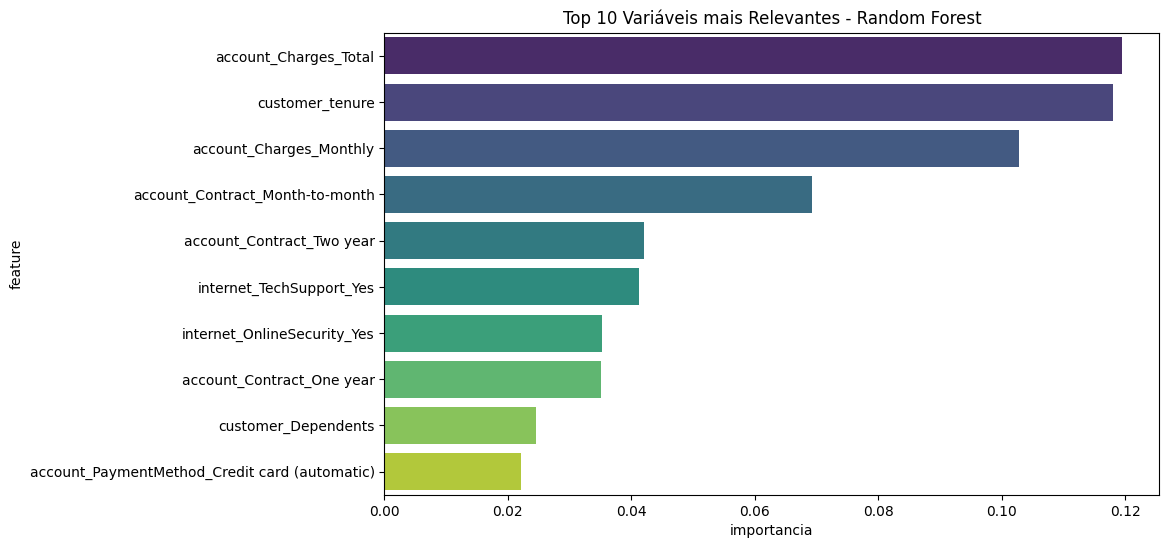

In [92]:
# Pegando a importância
importances = rf.feature_importances_

rf_df = pd.DataFrame({
    'feature': X_train.columns,
    'importancia': importances
})

rf_df.sort_values(by='importancia', ascending=False, inplace=True)
print(rf_df.head(10))  # top 10 variáveis mais relevantes

# Gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='importancia', y='feature', data=rf_df.head(10), palette="viridis")
plt.title("Top 10 Variáveis mais Relevantes - Random Forest")
plt.show()


### Análise de Importância das Variáveis

- **Regressão Logística:** as variáveis com maiores coeficientes (positivos e negativos) indicam os fatores que mais influenciam a probabilidade de evasão. Coeficientes positivos aumentam a chance de churn, enquanto coeficientes negativos reduzem.

- **Random Forest:** as variáveis mais importantes contribuíram significativamente para reduzir a impureza das divisões nas árvores, indicando forte relação com a evasão.  
- Essa análise permite identificar **drivers de churn**, priorizar ações de retenção e informar decisões estratégicas da empresa.


# Relatório de Churn de Clientes – Resumo

## 1️⃣ Objetivo
Analisar a evasão de clientes, identificar os fatores mais relevantes e propor estratégias de retenção, utilizando **Regressão Logística** e **Random Forest**.

---

## 2️⃣ Principais Fatores de Evasão

**Regressão Logística:**  
- **Tempo de contrato** maior → menor churn.  
- **Métodos de pagamento automáticos** (cartão, débito, cheque eletrônico) → maior retenção.  
- **Serviços digitais** (Online Backup, Online Security) → reduzem evasão.  

**Random Forest:**  
- **Gasto total e mensal** → clientes que consomem mais tendem a permanecer.  
- **Tipo e duração do contrato** → contratos longos reduzem churn; mensais aumentam.  
- **Suporte técnico e serviços digitais** → contribuem para retenção.  

**Insight:** Ambos os modelos indicam que **tempo de contrato, gastos, contratos longos, métodos de pagamento automáticos e serviços digitais** são os principais fatores de retenção.

---

## 3️⃣ Estratégias de Retenção

1. Incentivar contratos de longo prazo com benefícios ou descontos.  
2. Promover métodos de pagamento automáticos.  
3. Valorizar serviços digitais como Online Backup, Online Security e Tech Support.  
4. Focar em clientes novos ou com baixo gasto, oferecendo bônus ou suporte personalizado.  
5. Usar previsões dos modelos para identificar clientes em risco de churn e atuar preventivamente.

---

## 4️⃣ Conclusão

- **Random Forest:** melhor desempenho e captura relações complexas.  
- **Regressão Logística:** interpreta bem direção e magnitude dos fatores.  
- **Fatores consistentes:** tempo de contrato, métodos de pagamento, contratos longos e serviços digitais são essenciais para retenção.
